In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [2]:
df = pd.read_csv('/content/drive/MyDrive/IST347/Week_9/Wholesale customers data.csv')

In [3]:
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [4]:
df.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [5]:
scaler = StandardScaler()
cols = ['C','R'] + list(df.columns[2:])
df_2 = pd.DataFrame(data=scaler.fit_transform(df), columns = cols)
df_s = pd.concat([df.iloc[:,:2], df_2],axis=1)
df_s.drop(columns=['C','R'], axis=1, inplace=True)

In [6]:
df_s.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,0.052933,0.523568,-0.041115,-0.589367,-0.043569,-0.066339
1,2,3,-0.391302,0.544458,0.170318,-0.270136,0.086407,0.089151
2,2,3,-0.447029,0.408538,-0.028157,-0.137536,0.133232,2.243293
3,1,3,0.100111,-0.624020,-0.392977,0.687144,-0.498588,0.093411
4,2,3,0.840239,-0.052396,-0.079356,0.173859,-0.231918,1.299347


In [7]:
df_s.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,4.400000e+02,4.400000e+02,4.400000e+02,4.400000e+02,4.400000e+02,4.400000e+02
mean,1.322727,2.543182,-2.422305e-17,-1.589638e-17,-6.030530e-17,1.135455e-17,-1.917658e-17,-8.276208e-17
std,0.468052,0.774272,1.001138e+00,1.001138e+00,1.001138e+00,1.001138e+00,1.001138e+00,1.001138e+00
min,1.000000,1.000000,-9.496831e-01,-7.787951e-01,-8.373344e-01,-6.283430e-01,-6.044165e-01,-5.402644e-01
25%,1.000000,2.000000,-7.023339e-01,-5.783063e-01,-6.108364e-01,-4.804306e-01,-5.511349e-01,-3.964005e-01
50%,1.000000,3.000000,-2.767602e-01,-2.942580e-01,-3.366684e-01,-3.188045e-01,-4.336004e-01,-1.985766e-01
75%,2.000000,3.000000,3.905226e-01,1.890921e-01,2.849105e-01,9.946441e-02,2.184822e-01,1.048598e-01
max,2.000000,3.000000,7.927738e+00,9.183650e+00,8.936528e+00,1.191900e+01,7.967672e+00,1.647845e+01


In [8]:
df_s = df_s.values

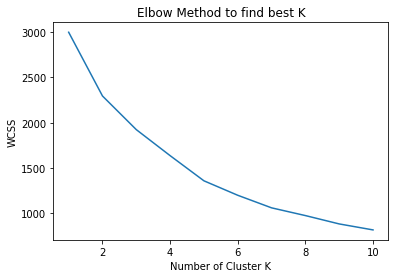

In [9]:
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters= i, init='k-means++', random_state=42)
    kmeans.fit(df_s)
    wcss.append(kmeans.inertia_)    

plt.plot(range(1,11), wcss)
plt.title('Elbow Method to find best K')    
plt.xlabel('Number of Cluster K')
plt.ylabel('WCSS')
plt.show()

In [10]:
# looks like best K = 6
kmeans = KMeans(n_clusters= 5, random_state=42)
y_kmeans = kmeans.fit_predict(df_s)

In [11]:
print(y_kmeans)

[2 2 2 0 4 0 0 2 0 2 2 0 2 2 2 0 2 0 2 0 0 0 4 2 2 0 0 0 2 4 0 0 0 4 0 2 4
 2 2 4 4 0 2 2 2 2 2 1 2 2 0 0 4 2 0 0 1 2 0 0 0 1 2 2 0 1 0 2 0 0 4 4 0 4
 2 0 0 2 0 0 0 2 2 0 0 1 1 4 0 4 0 0 1 4 2 0 0 0 0 0 2 2 2 4 0 0 2 2 2 2 0
 2 4 0 0 0 0 0 0 0 0 0 0 2 4 4 4 2 0 4 0 0 0 0 0 0 0 0 0 0 0 4 4 0 0 2 0 0
 0 4 0 0 0 0 0 2 2 0 2 2 2 0 0 2 2 2 2 0 0 0 2 2 0 2 0 2 4 0 0 0 0 4 2 3 0
 0 0 0 2 2 0 0 0 2 0 4 4 2 0 0 2 2 4 0 0 2 0 0 0 2 0 1 0 0 2 2 2 0 2 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 4 4 0 0 0 0 2 0 0 0 0 0 1 0 0 0 4 0 0 4
 4 0 0 0 0 2 2 2 0 2 0 0 0 0 4 0 0 4 4 0 2 0 0 4 4 4 4 0 0 0 4 0 0 0 2 0 0
 0 0 2 0 0 2 2 2 2 2 2 0 0 2 0 4 2 0 0 2 0 0 0 2 0 0 0 0 0 4 0 0 0 0 0 2 0
 1 4 2 0 0 0 0 2 2 0 2 0 0 2 2 0 2 0 2 0 2 0 0 0 2 0 0 0 0 0 0 0 2 0 0 0 0
 4 4 0 0 0 0 2 4 0 0 4 4 4 0 2 0 0 0 0 0 0 0 0 4 0 0 2 0 0 0 0 4 0 0 0 0 4
 2 0 0 0 0 0 4 0 2 2 0 2 0 2 2 0 0 2 4 2 4 0 0 0 4 0 0 0 4 4 2 0 0]


In [12]:
frame = pd.DataFrame(df)
frame['Cluster'] = y_kmeans
frame['Cluster'].value_counts()

0    257
2    113
4     59
1     10
3      1
Name: Cluster, dtype: int64

In [13]:
a = df_s[y_kmeans ==0,0] #cluster 0, channel
unique, counts = np.unique(a, return_counts=True)
dict(zip(unique, counts))

{1.0: 237, 2.0: 20}

In [14]:
b = df_s[y_kmeans ==0,1] #cluster 0, region
unique, counts = np.unique(b, return_counts=True)
dict(zip(unique, counts))

{1.0: 54, 2.0: 29, 3.0: 174}

In [15]:
c = df_s[y_kmeans ==2,1] #cluster 2, region
unique, counts = np.unique(c, return_counts=True)
dict(zip(unique, counts))

{1.0: 14, 2.0: 14, 3.0: 85}

In [16]:
frame.loc[frame.Cluster == 0].describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Cluster
count,257.000000,257.000000,257.000000,257.000000,257.000000,257.000000,257.000000,257.000000,257.0
mean,1.077821,2.466926,9088.112840,2845.420233,3571.494163,2309.128405,855.151751,950.007782,0.0
std,0.268412,0.819606,6798.641671,2549.015155,2716.089952,2401.466232,1071.222004,892.091302,0.0
min,1.000000,1.000000,3.000000,55.000000,3.000000,47.000000,3.000000,3.000000,0.0
25%,1.000000,2.000000,3225.000000,1115.000000,1694.000000,660.000000,187.000000,340.000000,0.0
50%,1.000000,3.000000,7864.000000,2013.000000,2661.000000,1439.000000,397.000000,689.000000,0.0
75%,1.000000,3.000000,13537.000000,3686.000000,4814.000000,3045.000000,960.000000,1215.000000,0.0
max,2.000000,3.000000,29526.000000,18664.000000,16966.000000,15601.000000,5316.000000,5137.000000,0.0


In [17]:
frame.loc[frame.Cluster == 2].describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Cluster
count,113.000000,113.000000,113.000000,113.000000,113.000000,113.000000,113.000000,113.000000,113.0
mean,1.946903,2.628319,6967.601770,10154.840708,15541.884956,1463.522124,6654.230088,1785.274336,2.0
std,0.225226,0.696864,7165.852304,5400.787787,6319.138479,1444.628864,3355.448826,2032.680783,0.0
min,1.000000,1.000000,18.000000,1275.000000,6544.000000,25.000000,282.000000,3.000000,2.0
25%,2.000000,3.000000,1531.000000,6551.000000,10790.000000,492.000000,4314.000000,674.000000,2.0
50%,2.000000,3.000000,4591.000000,8816.000000,13699.000000,1031.000000,6374.000000,1386.000000,2.0
75%,2.000000,3.000000,10362.000000,12220.000000,19816.000000,1920.000000,8035.000000,2158.000000,2.0
max,2.000000,3.000000,31714.000000,36423.000000,36486.000000,10155.000000,17120.000000,16523.000000,2.0


Looking to all clusters, Cluster 0 is the biggest cluster. In the cluster 0, most of the data region falls in region 3. Taking a deep look into cluster 0, it has the biggest range compare the min and the max values. The second large group is cluster two, the minimum and maximum value for the fresh product like Fresh, Milk and Grocery are higher. However, the minimun and maximum value for Frozen are lower. I am assuming that people in the cluster 0 buy more frozen product than cluster 2. Therefore, if people want to sell the Frozen product, they should focus on cluster 2. 